In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras

In [2]:
fmnist = keras.datasets.fashion_mnist

In [3]:
(train_img ,train_labels ),(test_img,test_labels)=fmnist.load_data()

label : 9

IMG PIXEL ARRAY :
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3 

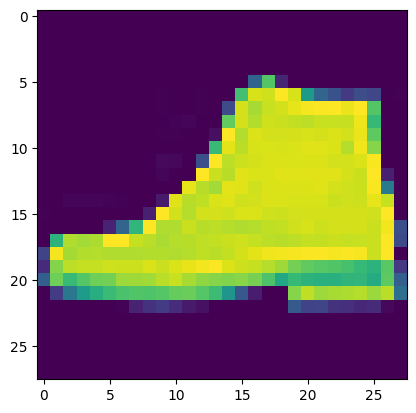

In [4]:
# you can index from 0 to 59999
index = 42

# set number of character per row when printing
np.set_printoptions(linewidth=320)


# print the label and the image
print(f"label : {train_labels[index]}")
print(f"\nIMG PIXEL ARRAY :\n {train_img[index]}")

# visulize the img
plt.imshow(train_img[index])

In [5]:
# normalize the pixel values of train and test images ( 0 - 1) ranged 
train_img = train_img / 255.0
test_img = test_img / 255.0

label : 9

IMG PIXEL ARRAY :
 [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.

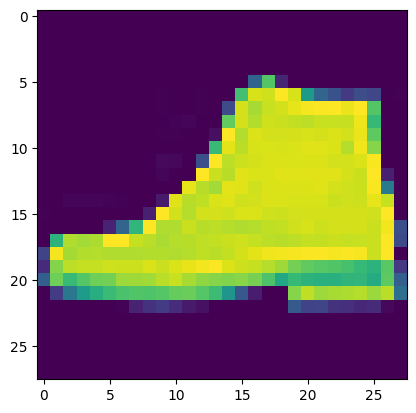

In [6]:
# you can index from 0 to 59999
index = 42

# set number of character per row when printing
np.set_printoptions(linewidth=320)


# print the label and the image
print(f"label : {train_labels[index]}")
print(f"\nIMG PIXEL ARRAY :\n {train_img[index]}")

# visulize the img
plt.imshow(train_img[index])

Using callback to get out desired accuracy (this will stop the epoch once we get our desired accuracy)

In [19]:
# call back function
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        '''
        halt the training after reaching 60 percent accuracy
        
        Arg:
            epoch(integer) - index of epoch (required but unused in the fucntion definition below)
            logs(dict) - metrix x result from training epoch
            '''
# check accuracy
        if(logs.get('loss')< 0.4 ):
        # stop if treshlod is met
            print(' n\ loss is lower than 0.4 so cancelling the training')
            self.model.stop_training = True
        
# intentiate class
callbacks = mycallback()
    

In [20]:
# build the classification model
model = tf.keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    
])

In [21]:
# fitting on the model
model.compile(optimizer='adam',
              loss  = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              
              )

model.fit(train_img,train_labels, epochs=5 , callbacks=[callbacks])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7795 - loss: 0.6347
Epoch 2/5
1855/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8648 - loss: 0.3805 n\ loss is lower than 0.4 so cancelling the training
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8648 - loss: 0.3804
